# Chapter 4 Data preprocessing
## 4.1 Know your data

In [1]:
# Imports
from pathlib import Path
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
DATA_PATH = "../data/data_ml.csv"
data_ml = pd.read_csv(DATA_PATH)
data_ml['date'] = pd.to_datetime(data_ml['date'])
data_ml.head()

,stock_id,date,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover,Bb_Yld,Bv,Capex_Ps_Cf,Capex_Sales,...,Total_Capital,Total_Debt,Total_Debt_Capital,Total_Liabilities_Total_Assets,Vol1Y_Usd,Vol3Y_Usd,R1M_Usd,R3M_Usd,R6M_Usd,R12M_Usd
0,13,2006-12-31,0.25,0.33,0.27,0.22,0.33,0.01,0.13,0.84,...,0.02,0.27,1.0,0.92,0.84,0.88,0.089,0.104,0.344,-0.041
1,13,2007-01-31,0.25,0.32,0.28,0.22,0.40,0.01,0.13,0.84,...,0.02,0.27,1.0,0.92,0.84,0.88,0.039,0.091,-0.011,-0.253
2,13,2007-02-28,0.26,0.30,0.30,0.22,0.15,0.01,0.13,0.84,...,0.02,0.27,1.0,0.92,0.87,0.88,-0.012,0.101,0.118,-0.366
3,17,2015-03-31,0.73,0.64,0.70,0.40,0.47,0.01,0.70,0.74,...,0.40,0.75,1.0,1.00,1.00,0.99,0.174,-0.144,-0.518,-0.376
4,17,2015-04-30,0.72,0.62,0.66,0.40,0.46,0.01,0.70,0.74,...,0.40,0.75,1.0,1.00,1.00,0.99,-0.106,-0.576,-0.535,-0.113


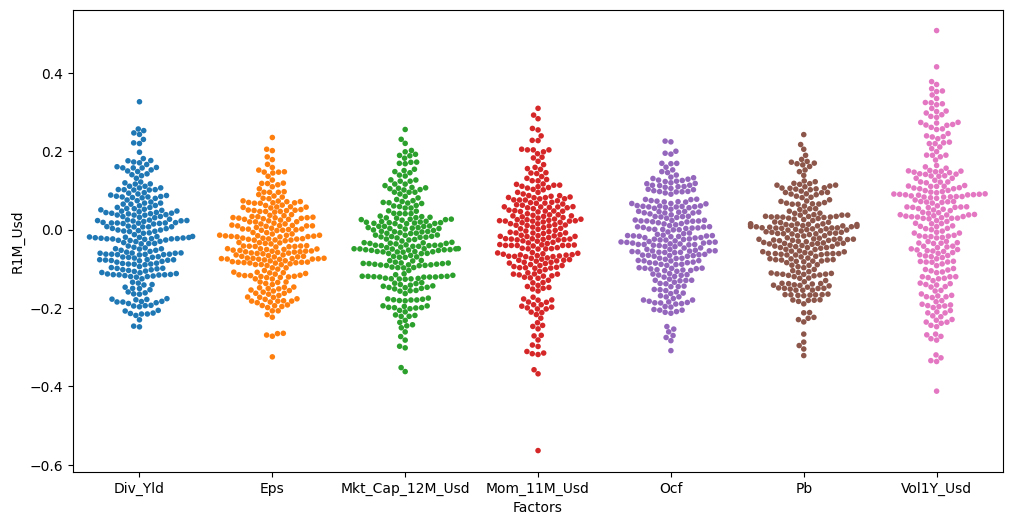

In [10]:
features=list(data_ml.iloc[:,3:95].columns) # Keep the features' column names
features_short =["Div_Yld", "Eps", "Mkt_Cap_12M_Usd", "Mom_11M_Usd", "Ocf", "Pb", "Vol1Y_Usd"]

cols= features_short+['R1M_Usd','date'] # Keep few features, label & dates
data_corr = data_ml[cols]               # Creating the working dataset
data_corr = data_corr.groupby('date').corr()[['R1M_Usd']].reset_index() # Group for computing correlation
data_corr= data_corr.loc[data_corr[data_corr.level_1.str[-7:] != "R1M_Usd"].index] # removing correl=1 instances from label
data_corr.rename(columns={'level_1': "Factors"},inplace=True) # Renaming for plotting later
plt.figure(figsize=(12,6))              # resizing the chart
sns.swarmplot(x="Factors", y="R1M_Usd", data=data_corr, size=4, hue="Factors", legend=False);

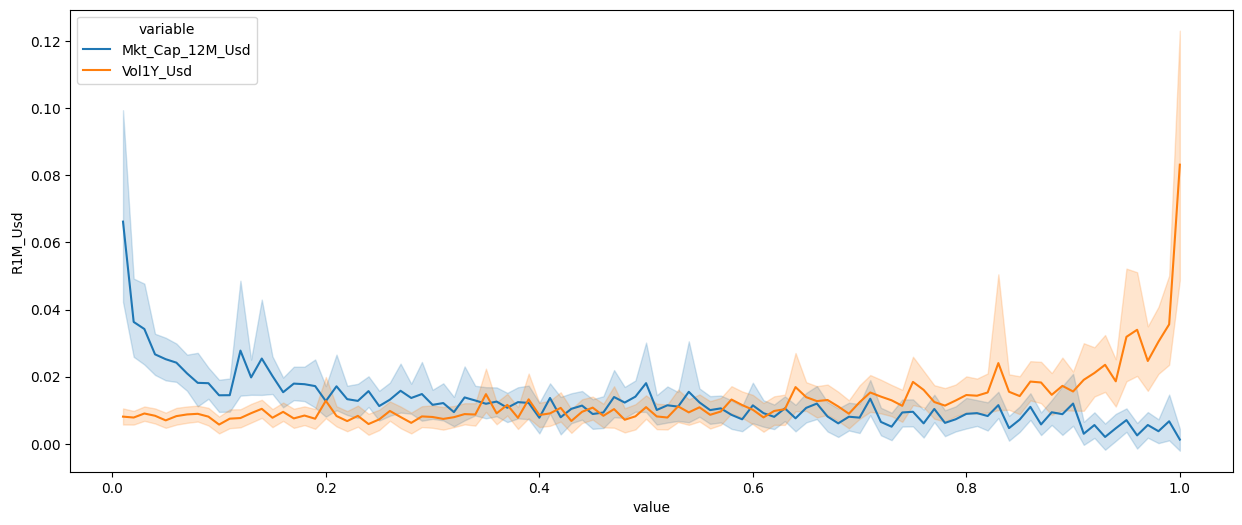

In [12]:
unpivoted_data_ml = pd.melt(data_ml[['R1M_Usd','Mkt_Cap_12M_Usd','Vol1Y_Usd']], id_vars='R1M_Usd') # selecting and putting in vector
plt.figure(figsize=(15,6))
sns.lineplot(data = unpivoted_data_ml, y='R1M_Usd', x='value', hue='variable'); # Plot from seaborn

d:\Code\ml-for-factor-investing\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


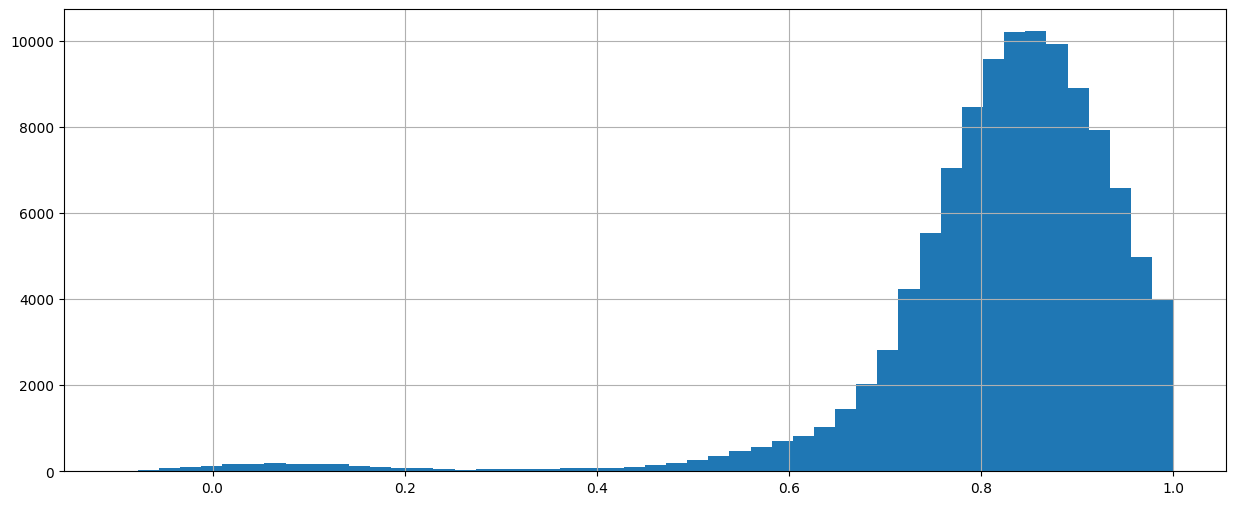

In [14]:
cols=[]                                 # cleaning the column list from previous use
cols = ['stock_id'] + list(data_ml.iloc[:,3:95].columns) # Keep all features and stockid
# below the nested line of code for sorting according the pair stockid/variable and then compute the acf
data_hist_acf=pd.melt(data_ml[cols], id_vars='stock_id').groupby(['stock_id','variable'], group_keys=False).apply(lambda x: x['value'].autocorr(lag=1), include_groups=False)
plt.figure(figsize=(15,6))
data_hist_acf.hist(bins=50,range=[-0.1,1]); # Plot from pandas